In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [136]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes (4).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.csv']))

In [138]:
df.values

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 1.67e-01, 2.10e+01, 0.00e+00],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [32]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-2.7.1:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-2.7.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? n


In [8]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 614kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 14.2MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 296kB 20.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=a959b1877c6e91d26b91b1402dee72715db32d193bbcc8bcf5579eae4e2849b9
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=1d33fa6725eed1c751f57dbfb7292d7de397e4f475907d194970f38aae468587
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=d894ad1cf097a55643f210f13e91a3dc7cd9db46fc48d8236909e

In [6]:
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
prof=ProfileReport(df)

In [8]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

In [9]:
prof

In [0]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [140]:
prof.to_file(output_file='/content/output-min.html')

In [141]:
prof

In [0]:
X = df.iloc[:,:-1]
y = df[df.columns[-1]]
y = y.astype(np.int64)


In [0]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [0]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [0]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [146]:
X_train

6  148  72  35    0  33.6  0.627  50
624   4   90  88  47   54  37.7  0.362  29
522   9  130  70   0    0  34.2  0.652  45
389   1  100  66  29  196  32.0  0.444  42
523   3  125  58   0    0  31.6  0.151  24
313   7  109  80  31    0  35.9  1.127  43
..   ..  ...  ..  ..  ...   ...    ...  ..
519   2   68  70  32   66  25.0  0.187  25
275   7  106  60  24    0  26.5  0.296  29
517  13   76  60   0    0  32.8  0.180  41
520   3  124  80  33  130  33.2  0.305  26
604   1  124  60  32    0  35.8  0.514  21

[613 rows x 8 columns]

In [147]:
y_train

624    0
522    1
389    0
523    0
313    1
      ..
519    0
275    1
517    0
520    0
604    0
Name: 1, Length: 613, dtype: int64

In [0]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [150]:
X_test

array([[-0.41176471,  0.18181818,  0.50877193, ...,  0.16542474,
        -0.85226302, -0.14285714],
       [-1.        ,  0.2020202 , -1.        , ..., -0.0342772 ,
        -0.94619983, -0.87755102],
       [-0.41176471,  0.29292929,  0.40350877, ...,  0.03129657,
        -0.94363792, -0.02040816],
       ...,
       [-0.05882353,  0.80808081,  0.26315789, ..., -0.02533532,
        -0.45260461, -0.3877551 ],
       [-0.17647059,  0.34343434,  0.47368421, ...,  0.19821162,
        -0.47224594, -0.34693878],
       [-1.        ,  0.32323232,  0.15789474, ...,  0.02235469,
        -0.89923143, -0.95918367]])

In [0]:
from torch import nn, optim

In [152]:
X_train.shape

(613, 8)

In [153]:
y_train.shape

(613,)

In [154]:
X_test.shape

(154, 8)

In [0]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [0]:
class PimaDiabetesNN(nn.Module):
  def __init__(self):
    super(PimaDiabetesNN, self).__init__()

    #Sequential oferă o alternativă mai estetică a codului
    #Rețeaua noastră are 2 neuroni pentru output.
    #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
    self.sequential= nn.Sequential(
        nn.Linear(8,100),
        nn.ReLU(),
        nn.Linear(100, 60),
        nn.ReLU(),
        nn.Linear(60, 2)
    )

  def forward(self, x):
    return self.sequential(x)

In [0]:
net = PimaDiabetesNN()

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()


In [0]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [0]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Training loop
def train(epoch):
  # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
  # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
  net.train()

  #Obținem predictii
  outputs = net(X_train)
  # Compute and print loss
  loss = criterion(outputs, y_train)

  losses.append(loss.item())
  # Zero gradients, perform a backward pass, and update the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Train Epoch: {epoch} Loss:{loss.item():.4f}')


In [0]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [0]:
def validation():
  #Pune pe off flagurile setate in model.train()
  #Din nou, în exemplul nostru e pur demonstrativ.
  net.eval()

  test_loss=0
  correct = 0

  with torch.no_grad():

    output=net(X_test)

    test_loss= criterion(output, y_test)
    test_losses.append(test_loss.item())

    #Obținem predictiile pentru fiecare linie din setul de validare.
    #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
    pred = output.data.max(1, keepdim=True)[1]

    #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
    #correct += pred.eq(y_test.data.view_as(pred)).sum()
    #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.

    accuracy = accuracy_score(y_test, pred)

    print("============")
    print(f"[Validation set] Average loss: {test_loss}, Accuracy: {100 * accuracy}%")
    print("============")

    accuracies.append(accuracy)

In [178]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(10000):
  train(epoch)
  validation()
  

Streaming output truncated to the last 5000 lines.
[Validation set] Average loss: 0.49663102626800537, Accuracy: 75.32467532467533%
Train Epoch: 8751 Loss:0.4144
[Validation set] Average loss: 0.4966331720352173, Accuracy: 75.32467532467533%
Train Epoch: 8752 Loss:0.4144
[Validation set] Average loss: 0.4966343939304352, Accuracy: 75.32467532467533%
Train Epoch: 8753 Loss:0.4144
[Validation set] Average loss: 0.49663594365119934, Accuracy: 75.32467532467533%
Train Epoch: 8754 Loss:0.4144
[Validation set] Average loss: 0.496640145778656, Accuracy: 75.32467532467533%
Train Epoch: 8755 Loss:0.4144
[Validation set] Average loss: 0.4966435134410858, Accuracy: 75.32467532467533%
Train Epoch: 8756 Loss:0.4144
[Validation set] Average loss: 0.49664345383644104, Accuracy: 75.32467532467533%
Train Epoch: 8757 Loss:0.4144
[Validation set] Average loss: 0.49664461612701416, Accuracy: 75.32467532467533%
Train Epoch: 8758 Loss:0.4144
[Validation set] Average loss: 0.496650755405426, Accuracy: 75.324

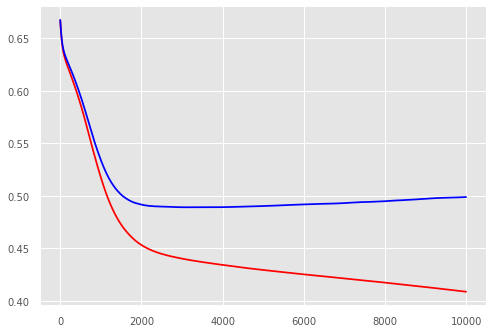

In [179]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")


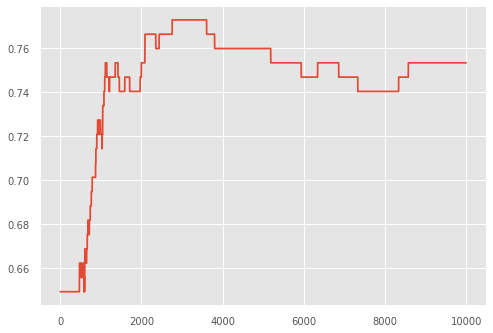

In [180]:
plt.plot(accuracies)

In [0]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(X_test[index_from_the_validation_set].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    print(preds_y)
    

In [182]:
try_a_single_example_with_the_network(60)

tensor([0])
